<a href="https://colab.research.google.com/github/abinashregmi/Semester-IV/blob/main/AI%20LABs/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df['mainroad'].dtype

dtype('O')

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X = df[['area', 'bedrooms', 'bathrooms', 'stories',  'parking']].values
y = df['price'].values
z = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']]




In [6]:
X = df[['area', 'bedrooms', 'stories', 'parking']]
y = df['price'].values
z = df [['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].apply(LabelEncoder().fit_transform)
X['mainroad']=z['mainroad']
X['guestroom']=z['guestroom']
X['basement']=z['basement']
X['hotwaterheating']=z['hotwaterheating']
X['airconditioning']=z['airconditioning']
X['parking']=z['parking']
X['prefarea']=z['prefarea']
X['furnishingstatus']=z['furnishingstatus']
X.head()

/tmp/ipython-input-4102739696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mainroad']=z['mainroad']
/tmp/ipython-input-4102739696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['guestroom']=z['guestroom']
/tmp/ipython-input-4102739696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,area,bedrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420,4,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,1,1
3,7500,4,2,3,1,0,1,0,1,1,0
4,7420,4,2,2,1,1,1,0,1,0,0


In [7]:
X.shape

(545, 11)

In [8]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

In [9]:
X_norm.shape

(545, 11)

In [10]:
y_min, y_max = y.min(), y.max()
y_norm = (y - y_min) / (y_max - y_min)


In [11]:
y_norm.shape

(545,)

In [12]:
X_tensor = torch.tensor(X_norm.values, dtype=torch.float32)
y_tensor = torch.tensor(y_norm.reshape(-1, 1), dtype=torch.float32)


In [13]:
class SingleLayerModel(nn.Module):
    def __init__(self):
        super(SingleLayerModel, self).__init__()
        self.linear = nn.Linear(11, 1)  # 11 inputs -> 1 output

    def forward(self, x):
        z = self.linear(x)
        return z

In [14]:
model = SingleLayerModel()

In [15]:
criterion = nn.MSELoss()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.0001)


In [17]:
epochs = 10000
loss_val=[]
for epoch in range(epochs):

    y_pred = model(X_tensor)

    loss = criterion(y_pred, y_tensor)
    print(f"Epoch: {epoch+1}, loss:{loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_val.append(loss.item())

Streaming output truncated to the last 5000 lines.
Epoch: 5001, loss:0.05652156099677086
Epoch: 5002, loss:0.05650540813803673
Epoch: 5003, loss:0.05648926645517349
Epoch: 5004, loss:0.05647312477231026
Epoch: 5005, loss:0.056457001715898514
Epoch: 5006, loss:0.05644087493419647
Epoch: 5007, loss:0.05642475187778473
Epoch: 5008, loss:0.05640863999724388
Epoch: 5009, loss:0.05639253184199333
Epoch: 5010, loss:0.05637642368674278
Epoch: 5011, loss:0.056360334157943726
Epoch: 5012, loss:0.05634424835443497
Epoch: 5013, loss:0.05632816255092621
Epoch: 5014, loss:0.056312087923288345
Epoch: 5015, loss:0.05629601702094078
Epoch: 5016, loss:0.056279949843883514
Epoch: 5017, loss:0.05626388639211655
Epoch: 5018, loss:0.056247834116220474
Epoch: 5019, loss:0.056231789290905
Epoch: 5020, loss:0.05621575191617012
Epoch: 5021, loss:0.05619971081614494
Epoch: 5022, loss:0.056183669716119766
Epoch: 5023, loss:0.05616765096783638
Epoch: 5024, loss:0.056151632219552994
Epoch: 5025, loss:0.056135620921

In [18]:
with torch.no_grad():
    final_preds_torch = model(X_tensor).numpy().flatten()

final_preds_denorm = final_preds_torch * (y_max - y_min) + y_min

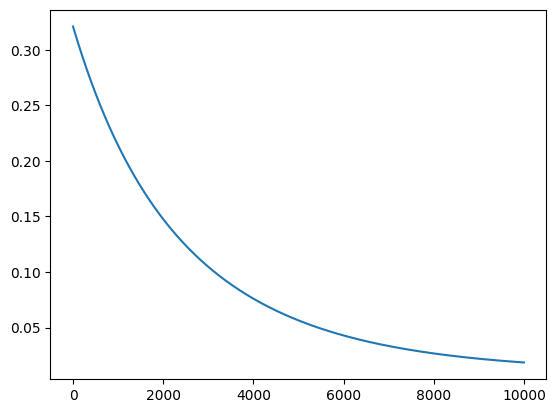

In [19]:

# y_pred = y_pred_tensor.numpy()
# plt.figure(figsize=(8,6))
plt.plot(loss_val)
plt.show()
# plt.legend()
# plt.show()

In [ ]:
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy()}")
print("Final MSE Loss:", loss.item())


linear.weight: [[ 0.23627196  0.12598489  0.21974406  0.12815627  0.11057263  0.04833353
   0.11000696  0.10479181  0.19278865  0.11801422 -0.0788833 ]]
linear.bias: [-1.1394283]
Final MSE Loss: 0.009483813308179379


X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

